# FIT 5196 Assignment 3
#### student name: Napoj Thanomkul
#### student id: 32338589

Date: 18/10/2021
Environment: python version 3.8.10 and anaconda 4.10.3

Package Usage: 
- pandas version 1.3.3 for dataframe manipulation. data cleaning
- numpy version 1.21.2 For mathematic calculation such as square,root,arctan,radians and etc.
- matplotlib version 3.4.3 for visualisation of data in reshapping task
- json version 2.0.9 for open and extract json file content
- shapefile version 2.1.3 for handling with shapefile
- Math for sin,cos,pow, and log
- Geopandas version 0.10.2 Parsing shapefile into a dataframe format
- shapely.geometry for handling with point and polygon for coordinate creation
- PyPDF2 for opening pdf file within the noebook and extract the content of pdf file
- datetime for date/time data manipulation
- requests version 2.26.0 for request/extract information from a url
- BeautifulSoup parsing both html and xml content
- re version 2.2.1 regular expression for identify the pattern within html content
- Scipy pearsonr for getting a correlation score
- Sklearn version 0.24.2 including linear_regression and train_test_split for fitting the model,predict getting r2_score and rmse.

## 1. Introduction

This assignment is divided into these following two tasks:

1. Data integration:

This section will be focused on extract the information from serveral sources such as xml.file, pdf.file(lga information), json.file, shp.file (from Vic_suburb_boundary directory), txt.file (from Vic_GTFS_data directory) and webscrapping of covid cases from https://covidlive.com.au/. Based on the following statement, the property_id,lat,lng, and addr_street will be exacted from xml and json file, and the coordinate for calculate closet_station_id, distance between property and closet station, travelling minute to Melbourne station and direct flag all txt.file(stops.txt, calendar.txt,stop_times.txt, and trips.txt). Then, extracting the lga and suburb information from pdf.file and shp.file. Next, the information of covid positive cases from 30 sep by lga in Victoria and the last 14-60 days of the covid cases will be extracted from https://covidlive.com.au/. Lastly, all the extracted information will be integrated together. 

2. Data Reshaping:

For this task, all the covid information from integrated dataset will be reshaped to make a linear model. The reshape process will be either normalisation/standardisation the data or transforming the data with several methods (log transformation, root transformation, and square transformation). After reshaping, the reshape data will be used to make a linear model.

All the assignment process will be done in the following process:

## 2. Import all the necessary packages for both tasks

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import json
import shapefile
import math
import geopandas
from shapely.geometry import Point,Polygon
import PyPDF2
import numpy as np
from datetime import datetime
import requests
import re
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

## 3. Task 1. Data Integration

### 3.1 Extract the property_id, lat, lon, and addr_street from xml and json files (based on tutorial on beautifulsoup and json file handling week 3)

To begin with, the xml file will be explored by using `with open('file') as something:` function to see the file structure  as the following:

In [2]:
#Explore the xml file
with open("32338589.xml") as f:
    xml = f.read()
print(xml)

<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<property>
  <property_id>89330</property_id>
  <lat>-37.946946</lat>
  <lng>145.003717</lng>
  <addr_street>21 Carew Street</addr_street>
</property>
<property>
  <property_id>913</property_id>
  <lat>-37.808285</lat>
  <lng>144.885595</lng>
  <addr_street>36 Bayview Road</addr_street>
</property>
<property>
  <property_id>18894</property_id>
  <lat>-37.68489075</lat>
  <lng>144.93168640000005</lng>
  <addr_street>45 Cuthbert Street</addr_street>
</property>
<property>
  <property_id>17746</property_id>
  <lat>-37.706247</lat>
  <lng>144.95176999999995</lng>
  <addr_street>81 Domain Street</addr_street>
</property>
<property>
  <property_id>27858</property_id>
  <lat>-37.5737911</lat>
  <lng>144.92370780000005</lng>
  <addr_street>87 Cra

In [3]:
#Adding root node (Chakraborti,2019)
with open("32338589.xml","w") as rf:
    rf.write("<Information>\n" + xml +"\n</Information>")
    rf.close()
print(open("32338589.xml").read())

<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<Information>
<property>
  <property_id>89330</property_id>
  <lat>-37.946946</lat>
  <lng>145.003717</lng>
  <addr_street>21 Carew Street</addr_street>
</property>
<property>
  <property_id>913</property_id>
  <lat>-37.808285</lat>
  <lng>144.885595</lng>
  <addr_street>36 Bayview Road</addr_street>
</property>
<property>
  <property_id>18894</property_id>
  <lat>-37.68489075</lat>
  <lng>144.93168640000005</lng>
  <addr_street>45 Cuthbert Street</addr_street>
</property>
<property>
  <property_id>17746</property_id>
  <lat>-37.706247</lat>
  <lng>144.95176999999995</lng>
  <addr_street>81 Domain Street</addr_street>
</property>
<property>
  <property_id>27858</property_id>
  <lat>-37.5737911</lat>
  <lng>144.92370780000005</lng>
  <addr

According to the above output, it seems that the xml is well-structure. The file did not have a root node, so it cannot be parsed. To fix the following problem, the root node will be added to the file with `file.write('<root>\n' + xml.read() + '\n</root>' )`  so the file will be parseable (Chakraborti,2019).

Once the file is parsed by `BeautifulSoup`, the `.prettify()` will be used to identify all the tag before extract the information based on the tag name as the following:  

In [4]:
#Extract the xml tree/data
prop_tree = BeautifulSoup(open("32338589.xml"),"lxml-xml") 
print(prop_tree.prettify())

<?xml version="1.0" encoding="utf-8"?>
<Information>
 <Information>
  <Information>
   <Information>
    <Information>
     <Information>
      <Information>
       <Information>
        <Information>
         <Information>
          <Information>
           <Information>
            <Information>
             <Information>
              <Information>
               <Information>
                <Information>
                 <Information>
                  <Information>
                   <property>
                    <property_id>
                     89330
                    </property_id>
                    <lat>
                     -37.946946
                    </lat>
                    <lng>
                     145.003717
                    </lng>
                    <addr_street>
                     21 Carew Street
                    </addr_street>
                   </property>
                   <property>
                    <property_id>
                     913
  

After all the tag is identified, all of the tag will be used for extract the information in xml file by using the `.find_all(tag_name)`to get the data within the tag and make the information as string by `.string`. Then, all the information will be store in a list by the list comprehension of `.find_all` and `.string` as the following:

In [5]:
ids = prop_tree.find_all("property_id")
for id in ids:
    print (id.string)

89330
913
18894
17746
27858
61254
81139
21401
64653
12596
2158
47189
93122
78250
80843
41975
73164
72014
24982
4652
57476
62199
15179
21165
3681
95813
59527
91470
31414
55571
23184
63998
92017
6179
48639
79012
1763
67289
8506
47307
12701
37553
30202
56709
43767
68225
96375
12396
52155
90405
17512
83587
61248
91194
20112
84310
46375
61607
83738
44538
69549
11828
78948
18944
33866
49501
14239
38126
43692
9141
6441
746
82805
14427
91159
85581
18874
12739
73620
9821
526
91707
67543
18162
63941
39837
42234
71836
40070
16814
68962
58060
11473
79214
20480
7021
57565
74745
29052
62388
36805
6430
28732
85065
29959
82017
30816
43125
71601
78750
49249
30775
53863
55639
68128
72056
82581
9893
67916
75941
76486
23546
15389
33932
54510
49813
1413
87459
67808
15635
39925
36941
88489
76078
33158
34423
13172
62848
25936
56983
91203
74637
70259
37669
52579
68139
58698
97014
57167
10014
96725
72558
33669
26741
60350
47950
72594
34200
62348
19750
33002
41937
50857
17706
23943
8616
84543
69052
74025
68933


In [6]:
property_id = [id.string for id in prop_tree.find_all("property_id")]

In [7]:
property_id

['89330',
 '913',
 '18894',
 '17746',
 '27858',
 '61254',
 '81139',
 '21401',
 '64653',
 '12596',
 '2158',
 '47189',
 '93122',
 '78250',
 '80843',
 '41975',
 '73164',
 '72014',
 '24982',
 '4652',
 '57476',
 '62199',
 '15179',
 '21165',
 '3681',
 '95813',
 '59527',
 '91470',
 '31414',
 '55571',
 '23184',
 '63998',
 '92017',
 '6179',
 '48639',
 '79012',
 '1763',
 '67289',
 '8506',
 '47307',
 '12701',
 '37553',
 '30202',
 '56709',
 '43767',
 '68225',
 '96375',
 '12396',
 '52155',
 '90405',
 '17512',
 '83587',
 '61248',
 '91194',
 '20112',
 '84310',
 '46375',
 '61607',
 '83738',
 '44538',
 '69549',
 '11828',
 '78948',
 '18944',
 '33866',
 '49501',
 '14239',
 '38126',
 '43692',
 '9141',
 '6441',
 '746',
 '82805',
 '14427',
 '91159',
 '85581',
 '18874',
 '12739',
 '73620',
 '9821',
 '526',
 '91707',
 '67543',
 '18162',
 '63941',
 '39837',
 '42234',
 '71836',
 '40070',
 '16814',
 '68962',
 '58060',
 '11473',
 '79214',
 '20480',
 '7021',
 '57565',
 '74745',
 '29052',
 '62388',
 '36805',
 '6430

As it was shown above, it seem that we have already extract the property_id. Now, the other information like lat,lng, and addr_street will be extracted with the same procedure as before and all of the information will be stored in many lists for creating a dataframe from xml file as the following:

In [8]:
#Extract the other information with the same procedure on property_id
lat = [lat.string for lat in prop_tree.find_all("lat")]
lng  = [lng.string for lng in prop_tree.find_all("lng")]
addr_street = [addr.string for addr in prop_tree.find_all("addr_street") ]

In [9]:
#Create dictionary for dataframe of the xml extract information
data_dict = {}
data_dict['property_id'] = property_id
data_dict['lat'] = lat
data_dict['lng'] = lng
data_dict['addr_street'] = addr_street

#Create dataframe
xml_df = pd.DataFrame(data_dict)
xml_df.head()

,property_id,lat,lng,addr_street
0,89330,-37.946946,145.003717,21 Carew Street
1,913,-37.808285,144.885595,36 Bayview Road
2,18894,-37.68489075,144.93168640000005,45 Cuthbert Street
3,17746,-37.706247,144.95176999999995,81 Domain Street
4,27858,-37.5737911,144.92370780000005,87 Cradle Mountain Drive


Following the above process, the json file will be parsed by using `json.load(file)` from json module. Once the file is parsed, the `type()` command will be used for identifying the data type of the json data.

In [10]:
#Explore json file
with open("32338589.json") as json_file:
    json_data = json.load(json_file)
print (type(json_data))

<class 'list'>


Based on the above result, the json data is already stored in list already so it can be used to create dataframe directly and the dataframe with json information will be merged with the xml dataframe to get all property_id, lat ,lng, and addr_street information as the following:

In [11]:
#Create dataframe based on list of dictionary
json_df = pd.DataFrame(json_data)
json_df.head()

,property_id,lat,lng,addr_street
0,54737,-37.817902,145.043152,8 Wright Street
1,86541,-37.926636,145.000534,3/15 Yuille Street
2,78892,-37.960029,145.143456,28 Hilton Avenue
3,78050,-37.924037,145.167193,4 Valewood Drive
4,10488,-37.794155,144.918866,38 The Crescent


In [12]:
#Combining xml and json dataframe by appending
append_df = xml_df.append([json_df])
append_df

#Check each data frame length
print(len(xml_df))
print(len(json_df))
append_df = append_df.reset_index()
append_df.drop(['index'],axis=1,inplace=True)
append_df

1227
1232


,property_id,lat,lng,addr_street
0,89330,-37.946946,145.003717,21 Carew Street
1,913,-37.808285,144.885595,36 Bayview Road
2,18894,-37.68489075,144.93168640000005,45 Cuthbert Street
3,17746,-37.706247,144.95176999999995,81 Domain Street
4,27858,-37.5737911,144.92370780000005,87 Cradle Mountain Drive
...,...,...,...,...
2454,56174,-37.851067,145.111815,12 McComas Grove
2455,34735,-37.729936,145.030237,34 Crevelli Street
2456,87739,-37.932447,144.99916,43 Margarita Street
2457,37268,-37.647612,145.030637,3/48 Davisson Street


In [13]:
#Information of append_df
append_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   property_id  2459 non-null   object
 1   lat          2459 non-null   object
 2   lng          2459 non-null   object
 3   addr_street  2459 non-null   object
dtypes: object(4)
memory usage: 77.0+ KB


Lastly, to finish up this section, the lat and lng column of the merged dataframe data type will be changed to float in order to be match with polygon data in the following section. This can be done by using `pd.to_numeric(dataframe['column'],downcast='float')` 

In [14]:
#Change the lat/lng column to float and round them
append_df["lat"] = pd.to_numeric(append_df["lat"], downcast="float")
append_df["lng"] = pd.to_numeric(append_df["lng"], downcast="float")

append_df.head(5)

,property_id,lat,lng,addr_street
0,89330,-37.946945,145.003723,21 Carew Street
1,913,-37.808285,144.885590,36 Bayview Road
2,18894,-37.684891,144.931686,45 Cuthbert Street
3,17746,-37.706245,144.951767,81 Domain Street
4,27858,-37.573792,144.923706,87 Cradle Mountain Drive


Also, the duplicate check will be executed to check for a duplication within the dataframe and once the duplicate is found the first data of the duplicate will be keep by using `.drop_duplicates(subset=dataframe.columns,keep='first')`. 

In [15]:
#Check for duplicate
append_df.nunique()

property_id    2442
lat            2382
lng            2316
addr_street    2413
dtype: int64

In [16]:
#Keep only the first one of duplicate
append_df=append_df.drop_duplicates(subset=append_df.columns,keep='first')

### 3.2 Extract Suburb from shape file (.shp file)

In the following section, `geopandas.read_file()` will be used for read the shapefile downloading from the Vic_suburb_boundary directory information into a dataframe as the following (Bhuiya,2018):

In [17]:
#Read shapefile by geopandas (Bhuiya,2018)
shape_f = geopandas.read_file("VIC_LOCALITY_POLYGON_shp.shp")
shape_f.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66876 -37.3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.90449 -37.9..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.82313 -37.6..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.27989 -35.9..."


After extract the information from shapefile, we know that there is a similar information between the shapefile and the merge dataset from previous section on the geometry columns and lat/lng column. Regarding the following information, the lat/lng column need to be made into a point coordinate by using `Point()` function on the two column to match the polygon on the geometry column. Then, storing the point into a list by apply it in list comprehension `[Point(point) for point in zip(append_df['lng'],append_df['lat'])]`(Sgillies, 2014) and using for loop to iterate through the coordinate list to check whether the polygon contain those coordinate point by using `.contains(point)` command (Tenkanen,2018). If the point is within those polygon, the suburb on `VIC_LOCA_2` will be append to the list as the following:

In [18]:
#This take a few second to run
#Extract lat and lng of append_df to make a coordinate point (Sgillies, 2014) 
all_coord = [Point(point) for point in zip(append_df['lng'],append_df['lat'])]
#Create a list contain suburb of the property_id
suburb = []

#If the coord is in the geometry column append the vic_loca_2 information to suburb list
for coord in all_coord:
    for poly,sub in zip(shape_f['geometry'],shape_f['VIC_LOCA_2']):
        if poly.contains(coord):
            suburb.append(sub)
print(suburb)

['SANDRINGHAM', 'SEDDON', 'BROADMEADOWS', 'HADFIELD', 'CRAIGIEBURN', 'RINGWOOD', 'DANDENONG', 'BRUNSWICK', 'CROYDON', 'DELAHEY', 'MAIDSTONE', 'ELTHAM', 'ASPENDALE', 'MULGRAVE', 'DANDENONG', 'HEIDELBERG', 'BORONIA', 'BAYSWATER', 'CRAIGIEBURN', 'NEWPORT', 'BLACKBURN', 'RINGWOOD', 'STRATHMORE', 'BRUNSWICK', 'YARRAVILLE', 'MCKINNON', 'MITCHAM', 'BEAUMARIS', 'THORNBURY', 'CAMBERWELL', 'COBURG', 'CROYDON', 'MENTONE', 'SUNSHINE', 'KEW', 'SPRINGVALE', 'KINGSVILLE', 'LILYDALE', 'CAIRNLEA', 'ELTHAM NORTH', 'DELAHEY', 'EPPING', 'NORTHCOTE', 'BURWOOD', 'WATSONIA', 'TOORAK', 'HALLAM', 'DELAHEY', 'RICHMOND', 'CHELTENHAM', 'HADFIELD', 'PRAHRAN', 'RINGWOOD', 'BEAUMARIS', 'CARLTON', 'PRAHRAN', 'ELTHAM', 'RINGWOOD', 'PRAHRAN', 'GREENSBOROUGH', 'ASHBURTON', 'KEILOR', 'SPRINGVALE', 'DALLAS', 'RESERVOIR', 'BALWYN', 'ABERFELDIE', 'FAIRFIELD', 'WATSONIA', 'SEABROOK', 'ALBION', 'SEDDON', 'ROWVILLE', 'ESSENDON', 'BEAUMARIS', 'ELSTERNWICK', 'BROADMEADOWS', 'DELAHEY', 'BORONIA', 'WERRIBEE', 'WEST FOOTSCRAY', 'BE

In [19]:
#Create suburb column in dataframe
append_df.insert(4,'suburb',suburb)
append_df.head(5)

,property_id,lat,lng,addr_street,suburb
0,89330,-37.946945,145.003723,21 Carew Street,SANDRINGHAM
1,913,-37.808285,144.885590,36 Bayview Road,SEDDON
2,18894,-37.684891,144.931686,45 Cuthbert Street,BROADMEADOWS
3,17746,-37.706245,144.951767,81 Domain Street,HADFIELD
4,27858,-37.573792,144.923706,87 Cradle Mountain Drive,CRAIGIEBURN


### 3.3 Extract lga from pdf file

For the following section, PyPDF2 is used for reading the pdf file by `PdfFileReader(open(filename))` and get all the contents within each pages by using `.numPages` to look through pages and `getPage()` and store the information into new file `lga_list.txt`. by using `write(.extractText())` (Sandeep,2011). After the previous procedures, the `lga_list.txt` will need to be pre-process by remove some contents and split each line within the file by using `.splitlines()`. Then, we will store the even lines content to suburb list and store the odd lines content to the lga_list; after that, these two lists will used for making dataframe and `eval ` will be used to make a column suburb column into a list within dataframe. Lastly, the `.explode()` command will be used to separate the list in the column by each row and `.apply(lambda x:x.upper().strip())` will be used on suburb column (Dolon,2019;Hilsdolf,2020).

In [20]:
#Parse PDF
lga_pdf = open("lga_to_suburb.pdf","rb")
#Convert PDF file into txt file for text handling
pdfreader= PyPDF2.PdfFileReader(lga_pdf)
x=pdfreader.numPages
with open("lga_list.txt","w",encoding="UTF-8") as A3_file:
    for i in range(x):
        page = pdfreader.getPage(i)
        A3_file.write(page.extractText())

#Turn pdf to text file and create dataframe
lga_dict = {}
with open("lga_list.txt","r", encoding="UTF-8") as a3:
    lga_file=a3.read()
    lga_file=lga_file.replace('\n',' ')
    lga_file=lga_file.replace(':','\n')
    lga_file=lga_file.replace('  ','\n')
    lga_file = lga_file.replace(',\n',",")
    lga_file = lga_file.replace('y\n','y')
    lga_file=lga_file.replace('S T','ST')
    lga_file=lga_file.replace('H e','He')
    lga_file=lga_file.replace('Ep p','Epp')
    lga_file=lga_file.replace('War ren','Warren')
    lga_file=lga_file.replace('Syde nham','Sydenham')
    lga_file = lga_file.replace('Edithv ale',' Edithvale')
    lga_file=lga_file.replace('t h','th')
    lga_file=lga_file.replace('n v','nv')
    lga_file=lga_file.replace('Ve rmont South','Vermont South')
    lga_file=lga_file.replace('Greenval e','Greenvale')
    list_lga= lga_file.splitlines()

#Remove the last element of the list
list_lga.pop(-1)

#Making a list of suburb and lga
lga_list,sub_list=list_lga[::2],list_lga[1::2]
lga_df = pd.DataFrame(list(zip(lga_list, sub_list)),
               columns =['lga', 'suburb'])

#Using eval to make the value inside the suburb column into a list then explode the list  (Dolon, 2019; Hilsdolf,2020)
lga_df['suburb'] = lga_df['suburb'].apply(eval)
lga_df=lga_df.explode('suburb')
lga_df['suburb'] = lga_df['suburb'].apply(lambda x:x.upper().strip()) #Making the element an uppercase
lga_df.head()

,lga,suburb
0,BANYULE,ABBOTSFORD
0,BANYULE,AIRPORT WEST
0,BANYULE,ALBERT PARK
0,BANYULE,ALPHINGTON
1,BRIMBANK,ALTONA


In [21]:
#Merge lga_df with append _df 
append_df=pd.merge(append_df,lga_df,how='left',on=['suburb'])

In [22]:
append_df.head()

,property_id,lat,lng,addr_street,suburb,lga
0,89330,-37.946945,145.003723,21 Carew Street,SANDRINGHAM,PYRENEES
1,913,-37.808285,144.885590,36 Bayview Road,SEDDON,EAST GIPPSLAND
2,18894,-37.684891,144.931686,45 Cuthbert Street,BROADMEADOWS,WODONGA
3,17746,-37.706245,144.951767,81 Domain Street,HADFIELD,WYNDHAM
4,27858,-37.573792,144.923706,87 Cradle Mountain Drive,CRAIGIEBURN,YARRA RANGES


### 3.4 Extract the information for closet_station id, distance_to_closet_id, travel_minute to melbourne central station and direction flag

In the following section, it will be divided into four part as the following:

#### 3.4.1 Data preparation for information extraction

To begin with, all the relevant files such as `stops.txt`,`calendar.txt`,`stop_times.txt` and `trips.txt` will be used for extract the lat/lon of station, stop_id for station, the day that the trip operate from calendar.txt, departure/arrival time of each stops , stop_sequence and trip_id. All of the following information will be used for calculating the closet_distance,closet_id ,travel_minute and flag information by the following process:

All the mentioned file will be read by using `read_csv(filename,sep=',')` to make the text file in a form of table

In [23]:
#get closet train_id and distance to closet train from all the relevant supplementary files (such as stop,stop_time,calendar,trips,)
stop = pd.read_csv('stops.txt',sep=",")
calendar = pd.read_csv('calendar.txt',sep=',')
stop_time = pd.read_csv('stop_times.txt',sep=',')
trip = pd.read_csv('trips.txt',sep=',')

After the file is read, the stop_id of Melbourne Central Railway Station and trip_id which have stop sequence more than 1 and reach Melbourne Central station will be extracted into a list:

In [24]:
#Getting stop id of Melbourne Central station
mel_id=list(stop[stop['stop_name']=='Melbourne Central Railway Station'].stop_id)[0]

#Getting trip travelling to the Melbourne Central station by more than 1 trip sequence
mel_trip = list(stop_time[(stop_time['stop_id']==mel_id) & (stop_time['stop_sequence']>1)].trip_id)

Next, the trip that only operate on the weekday only will be identified and store into a list by filtering the merge dataset of trip and calendar saturday and sunday column which equal to zero, and whether it is in the trip to Melbourne Central Station by using list comprehension on melbourne central trip and check whether it is a weekday trip only. Based on the following, we will get 5963 trips that only operate in weekday that going to Melbourne Central Station.

In [25]:
#Joining trip and calendar for filtering a weekdays trip
trip_result= pd.merge(trip,calendar,on='service_id')

#Filtering the trip started on weekday only
week_day = trip_result[(trip_result['saturday']==0)&(trip_result['sunday']==0)]
weekday_trip = list(week_day['trip_id'])

In [26]:
#remove weekend trip of melbourne trip
mel_trip_wd = [t for t in mel_trip if t in weekday_trip]
len(mel_trip_wd)

5963

Once all the relevant weekday trip is identified, the trip that only run between 7:00 - 9:00 is identified. Then the set of stop_id and trip_id of these trips will be created which will be used for creating a coordinate point later on.

In [27]:
#Getting a depature time at 7:00-9:00
morning_stop= stop_time[stop_time['trip_id'].isin(mel_trip_wd) & (stop_time['departure_time']>'07:00:00') & (stop_time['departure_time']<'09:00:00')]

#getting stop id of morning trip and trip id  which will used later on to get the coordinate 
mor_stop_id = set(list(morning_stop['stop_id']))
mor_trip_id= set(list(morning_stop['trip_id']))

len(mor_stop_id)

180

Then, the information of all the stop_id before reaching the Melbourne Central Station by looking at the stop_sequence and trip_id that reach Melbourne Central and in the morning. If all the condition is met, add the stop_id to the set. Lastly, the trip which is in the morning and the stop_id match with the Melbourne Central Railway station, and trip_id which is between 7:00-9:00.

In [28]:
#This takes a few minutes to run
#Extract all the stop before Melbourne Central
before_stop =set()
for t in mor_trip_id:
    #list of stop_id to Melbourne central in the morning
    trip_list = list(morning_stop[morning_stop['trip_id']==t].stop_id)
    # getting stop sequence trip to Melbourne central
    seq_stop=list(stop_time[(stop_time['trip_id']==t) & (stop_time['stop_id']==mel_id)].stop_sequence)[0]
    for stop_id in trip_list:
        #Identify all the stop sequence before reaching Melbourne Central
        if list(morning_stop[(morning_stop['trip_id']==t) & (morning_stop['stop_id']==stop_id)].stop_sequence)[0] <= seq_stop:
            before_stop.add(stop_id)

In [29]:
#Getting the arrival time from all the appropriate trip of melbourne central station in one go or no trip at all
app_df=stop_time[stop_time['trip_id'].isin(mor_trip_id) & (stop_time['stop_id']==mel_id)]

#### 3.4.2 Haversine formula for identify closet_id and closet_id_distance


After all the preparation, we will used all dataframe,set and list from previous processes to make a coordinate for getting closet_id,distance,travel_minute, and flag by these processes:

Firstly, the lat/lon based on stop dataframe which is in the set which have all the stop_id trip before reaching Melbourne Central Railway station and lat/lon of main dataframe will be extract into a different lists.

In [30]:
#Extract the coordinate from stop lat/lng
#All stop from before_stop set
stops= stop[stop['stop_id'].isin(before_stop)]

#Extract lat/lon and stop_id of stop 
coor_stop=[coor for coor in zip(stops['stop_id'],stops['stop_lon'],stops['stop_lat'])]

# extract lat/lng coordinate from main dataframe
coor_points=[ coor for coor in zip(append_df['lng'],append_df['lat'])]

Next, the coordinate point for the relevant stop before reaching Melbourne Central Railway Station and coordinate point from main dataset will used on the haversine formula to calculate the distance of closet_id_distance and closet_id. For the closet_id, the index 0 of coor_stop after apply haversine formula to it (Kettle, 2017;Geeksforgeeks,2021). In addition, the `min()` function will be used to get the accurate smallest value after calculation. After getting the result, they will be stored in a list for closet_id and closet_distance.

In [31]:
#Haversine distance calculated function (Geeksforgeeks,2021)
def haversine(lat_1,lon_1,lat_2,lon_2):
    """
    This is a function based on Haversine equation as the following:
    Haversine equation:   
    
    a = sin²( φ2- φ1/2) + cos(φ1).cos(φ2).sin²(λ2-λ1/2)
    c = 2.atan2(√a, √(1−a))
    d = R.c
    
    where   φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,378km);
    Also, the angles of each lat and lon need to be in radians in order to apply them to trigonometry function.
    (Kettle, 2017)
    """
    R = 6378
    lat_1,lon_1,lat_2,lon_2 = map(np.radians, [lat_1,lon_1,lat_2,lon_2])
    
    diff_lat = lat_2-lat_1
    diff_lon= lon_2-lon_1
    
    a=pow(math.sin(diff_lat/2),2)+math.cos(lat_1)*math.cos(lat_2)*pow(math.sin(diff_lon/2),2)
    c = 2*np.arctan2(math.sqrt(a),math.sqrt(1-a))
    d = R * c
    return d

In [32]:
#Getting closet_trainstation_id and distance to the certain train station
#Getting list of closet station id
closet_station_id = []
#Getting list of calculated distance to the closet station
closet_distance=[]
#Getting the value for each list
for coor in coor_points:
    closet_station_id.append(min(coor_stop,key=lambda dest:haversine(coor[1],coor[0],dest[2],dest[1]))[0])
    closet_distance.append(min([haversine(coor[1],coor[0],dest[2],dest[1]) for dest in coor_stop]))

Once the lists are created, they will be used for created `closet_train_station_id`and `distance_to_closest_train_station` column in the main dataframe.

In [33]:
append_df['closet_train_station_id'] = closet_station_id
append_df['distance_to_closest_train_station'] = closet_distance

In [34]:
append_df.head()

,property_id,lat,lng,addr_street,suburb,lga,closet_train_station_id,distance_to_closest_train_station
0,89330,-37.946945,145.003723,21 Carew Street,SANDRINGHAM,PYRENEES,19937,3.219545
1,913,-37.808285,144.885590,36 Bayview Road,SEDDON,EAST GIPPSLAND,20023,0.721272
2,18894,-37.684891,144.931686,45 Cuthbert Street,BROADMEADOWS,WODONGA,20030,1.083170
3,17746,-37.706245,144.951767,81 Domain Street,HADFIELD,WYNDHAM,19961,0.880863
4,27858,-37.573792,144.923706,87 Cradle Mountain Drive,CRAIGIEBURN,YARRA RANGES,40221,3.567360


#### 3.4.3 Find average time from closet_id to Melbourne Central Station

Regarding all the previous steps, the arrival and departure time of all the relevant trip will be used to calculated the travelling minute to Melbourne Central Railway station based on the closet_id and all relevant stop_id from `mor_stop_id` to get all the time from relevant trips and calculate the average for each time between each closet_id to Melbourne Central Railway Station. After the calculation is done, they will be appended to the list for create a new column in the main dataframe.

In [35]:
#Take around 30-45 minutes to run
#list of traveling time to Melbourne Central Station
travel_mc=[]

#loop trough closet station id to check whether it is in the morning trip to Melbourne Central
for station in closet_station_id: 
    sta_lis=[]
    if station in mor_stop_id:
        # List of station with trip_id to Melbourne Central Station
        mc_trip=list(morning_stop[morning_stop['stop_id']==station].trip_id)
        #Using all the trip_id got from the loop and getting depature/arrival time of each trip
        for t in mc_trip:
            #Create depature time/arrival time list of morning trip to calculate average time from closet_id to Melbourne Central
            time1 = list(morning_stop[(morning_stop['stop_id']==station) &(morning_stop['trip_id']==t) ].departure_time)[0] 
            time2 = list(app_df[(app_df['stop_id']==mel_id) &(app_df['trip_id']==t)].arrival_time)[0]
            time_format = '%H:%M:%S'
            # for each trip, if the arrival time of station before Melbourne Central station is moe than or equal to departure time find the time interval
            #and calculate the average time
            if datetime.strptime(time2, time_format) >= datetime.strptime(time1, time_format):
                time_dff = datetime.strptime(time2, time_format) - datetime.strptime(time1, time_format)
                sta_lis.append(time_dff.seconds/60)
        travel_mc.append(sum(sta_lis)/len(sta_lis))

In [36]:
append_df['travel_min_to_MC'] = travel_mc
append_df.loc[(append_df['closet_train_station_id']==mel_id),"travel_min_to_MC"]=int(0)
append_df.loc[append_df['closet_train_station_id']==mel_id]

,property_id,lat,lng,addr_street,suburb,lga,closet_train_station_id,distance_to_closest_train_station,travel_min_to_MC
54,20112,-37.796726,144.965683,252 Elgin Street,CARLTON,STRATHBOGIE,19842,1.495672,0.0
860,30,-37.809052,144.963577,315/406 Latrobe Street,MELBOURNE,BENALLA,19842,0.131301,0.0
881,20127,-37.796680,144.965073,272 Elgin Street,CARLTON,STRATHBOGIE,19842,1.491897,0.0
2253,20024,-37.803886,144.967636,117 Drummond Street,CARLTON,STRATHBOGIE,19842,0.806596,0.0


#### 3.4.4 Directed_journey_flag

After the `travel_min_to_MC` column is created , it will be rounded by `.apply(lambda x:round(x))` to get the estimated average time travelling to Melbourne Central Railway station, and all the null will be replace with "not available".  Also, we can set the flag column to 0 if the average time is not available and 1 for the available average travelling time.

In [37]:
#Round the value of travelling minute and fill the null with not available
append_df['travel_min_to_MC'] = append_df['travel_min_to_MC'].apply(lambda x:round(x))
append_df['travel_min_to_MC'] = append_df['travel_min_to_MC'].fillna("not available")
append_df.head()

,property_id,lat,lng,addr_street,suburb,lga,closet_train_station_id,distance_to_closest_train_station,travel_min_to_MC
0,89330,-37.946945,145.003723,21 Carew Street,SANDRINGHAM,PYRENEES,19937,3.219545,34
1,913,-37.808285,144.885590,36 Bayview Road,SEDDON,EAST GIPPSLAND,20023,0.721272,15
2,18894,-37.684891,144.931686,45 Cuthbert Street,BROADMEADOWS,WODONGA,20030,1.083170,32
3,17746,-37.706245,144.951767,81 Domain Street,HADFIELD,WYNDHAM,19961,0.880863,30
4,27858,-37.573792,144.923706,87 Cradle Mountain Drive,CRAIGIEBURN,YARRA RANGES,40221,3.567360,41


In [38]:
#Apply the flag for each trip from property_id to melbourne central station
append_df.loc[(append_df['travel_min_to_MC']=="not available"),'direct_journey_flag']=int(0)
append_df.loc[(append_df['travel_min_to_MC']!="not available"),'direct_journey_flag']= int(1)
append_df[append_df['travel_min_to_MC']=='not available']

,property_id,lat,lng,addr_street,suburb,lga,closet_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag


### 3.5 Webscrapping of the information of covid cases

For this section, web scrapping of multiple urls will be proceed by getting all the url for scrap all the relevant information(Amant,2020b). These urls below are all the relevant url which will be used for extract the covid cases information.

In the beginning, the multiple urls will be acquired by append them to a list. The main url is 'https://covidlive.com.au/vic/'  with the lga name behind the dash. To get all the main link, we will use the main dataframe['lga'].unique() to put the lga name behind the dash of the link. (All the unique name will be make into smaller case, and some element like dash will be added or remove)

In [39]:
#Getting all the relevant url  (Amant,2020b)
urls = []
for i in append_df['lga'].unique():
    urls.append('https://covidlive.com.au/vic/'+i.lower().strip().replace(' ','-').replace('---','-'))
print(urls)
len(urls)

['https://covidlive.com.au/vic/pyrenees', 'https://covidlive.com.au/vic/east-gippsland', 'https://covidlive.com.au/vic/wodonga', 'https://covidlive.com.au/vic/wyndham', 'https://covidlive.com.au/vic/yarra-ranges', 'https://covidlive.com.au/vic/macedon-ranges', 'https://covidlive.com.au/vic/cardinia', 'https://covidlive.com.au/vic/maribyrnong', 'https://covidlive.com.au/vic/buloke', 'https://covidlive.com.au/vic/baw-baw', 'https://covidlive.com.au/vic/frankston', 'https://covidlive.com.au/vic/yarriambiack', 'https://covidlive.com.au/vic/monash', 'https://covidlive.com.au/vic/towong', 'https://covidlive.com.au/vic/indigo', 'https://covidlive.com.au/vic/mansfield', 'https://covidlive.com.au/vic/greater-geelong', 'https://covidlive.com.au/vic/knox', 'https://covidlive.com.au/vic/mitchell', 'https://covidlive.com.au/vic/horsham', 'https://covidlive.com.au/vic/port-phillip', 'https://covidlive.com.au/vic/latrobe', 'https://covidlive.com.au/vic/melbourne', 'https://covidlive.com.au/vic/moonee

71

Next, the `pd.date_range()` will be used for create a list of relevant date before extract the data from the website (McKinney,2020). Then, all the relevant date format will be changed to date number with initial of month, stored in list, and the list will be reversed.

In [40]:
#All 60 days start from 30 september (McKinney,2020)
day_list=pd.date_range(start="2021-08-01",end="2021-09-30").tolist()
d_list=[i.strftime('%d %b') for i in day_list]
d_list.reverse()
print(d_list)
print(len(d_list),"days")
print(d_list[0],d_list[1],d_list[14],d_list[30],d_list[60])

['30 Sep', '29 Sep', '28 Sep', '27 Sep', '26 Sep', '25 Sep', '24 Sep', '23 Sep', '22 Sep', '21 Sep', '20 Sep', '19 Sep', '18 Sep', '17 Sep', '16 Sep', '15 Sep', '14 Sep', '13 Sep', '12 Sep', '11 Sep', '10 Sep', '09 Sep', '08 Sep', '07 Sep', '06 Sep', '05 Sep', '04 Sep', '03 Sep', '02 Sep', '01 Sep', '31 Aug', '30 Aug', '29 Aug', '28 Aug', '27 Aug', '26 Aug', '25 Aug', '24 Aug', '23 Aug', '22 Aug', '21 Aug', '20 Aug', '19 Aug', '18 Aug', '17 Aug', '16 Aug', '15 Aug', '14 Aug', '13 Aug', '12 Aug', '11 Aug', '10 Aug', '09 Aug', '08 Aug', '07 Aug', '06 Aug', '05 Aug', '04 Aug', '03 Aug', '02 Aug', '01 Aug']
61 days
30 Sep 29 Sep 16 Sep 31 Aug 01 Aug


After getting all the relevant date, the data from all the url will be scrapped by using combination of for loop on the url list and using requests and BeatifulSoup.
This process will start with using `.get()` from requests module to get information from url. Then using `BeautifulSoup(get.content,'html.parser')` to parse html. After that, the `.find()` will be used to find all the relevant information based on the html structure tag where the information is stored. In this case, the information is stored in table tag with the name 'DAILY-CASES-BY-LGA'. Once the location of all relevant information is ready, the `find_all` will be used for getting all the tag within the table tag and `.get_text('t')` to get all the text and separate the column of the table by 't' (Amant,2020a). (This is done for more convenient in exact the exact information).

In [41]:
#take a few seconds to run
#Getting information based on all url (Amant,2020a)
data=[]

for url in urls:
    html = requests.get(url)
    bs = BeautifulSoup(html.content,'html.parser')
    covid_table = bs.find('table', attrs = {'class': 'DAILY-CASES-BY-LGA'})
    
    for link in covid_table.find_all('tr'):
        data.append(link.get_text('t'))

data[0:5]

['\ntDATEt15+tSECONDtCASEStACTIVEtVARtNET',
 '30 Octt13t6t\xa0t1',
 '29 Octt12t5t\xa0t2',
 '28 Octt10t3t\xa0t0',
 '27 Octt10t3t\xa0t0']

The above code output is the content which separate by t on each column which is stored in a list. After getting all the content, the function for exact the information from a certain date and calculate the covid cases number will be created (Amant,2020a). 

The function for exact the case number by date is create by using the combination of regular expression on the date list and data list (the full explanation will be on the function:

In [42]:
#Function for extract the cases from list
def num_case(lis_ind,data):
    """
    The function is used for getting all the case on a certain date by each lga 
    using of regex to find a pattern based on list[index] on the data
    Parameter: lis_ind is list of date with an index which will give the result of certain date
    data is the list of data from web scrapping of multiple url
    """
    #all the data with the date pattern will be store in the above list (Amant,2020a)
    all_cases=[]
    for i in data:
        pattern=re.compile(lis_ind+'.*')
        result = pattern.findall(str(i))
        all_cases.append(result)
    
    #Remove the empty set within the above list
    all_cases = [i for i in all_cases if i != []]
    
    #Getting positive case number into a list based on the above list
    cases_pos=[]
    
    #Replace the date with blank
    for j in range(0,len(all_cases)):
        for i in all_cases[j]:
            cases_pos.append(i.replace(lis_ind+'t',''))
     
    #Using resub to replace the t and other string behind t with blank and store them in list and make them into an integer
    all_pos_cases=[re.sub(r't.*','',i) for i in cases_pos]
    all_pos_cases=[i.replace(",","") for i in all_pos_cases]
    all_pos_cases = [int(i) for i in all_pos_cases]
    
    return all_pos_cases

In [43]:
#Create a list of all cases by relevant date for calculation
thirty_sep=num_case(d_list[0],data)
two9_sep=num_case(d_list[1],data)
one6_sep=num_case(d_list[14],data)
thirtyone_aug=num_case(d_list[30],data)
one_aug=num_case(d_list[60],data)

The function for calculate the number of case is based on difference in value between the list of the case by each relevant date created by `num_case()` function. The function is worked by the following explanation: 

In [44]:
#Case calculation function
def diff_case(list1,list2):
    """
    The parameter of this function is any two list consist of cases of each lga by a certain date
    Once all the parameter is met, they will be use for calculate for the active case by finidng the difference in case
    numbers between two date.
    for example:
    [1,2] - [0,0] = [1,2]
    """
    #Create a list based on the difference in cased between two certain date
    active_cases=[]
    cases = zip(list1, list2)
    for lis1, lis2 in cases:
        active_cases.append(lis1-lis2)
    return active_cases

In [45]:
all_30sep=diff_case(thirty_sep,two9_sep)
all_14day=diff_case(two9_sep,one6_sep)
all_30day=diff_case(two9_sep,thirtyone_aug)
all_60day=diff_case(two9_sep,one_aug)

After getting the number of cases by the relevant date we will use these lists to create new dataframe which contain all 30 september covid cases and 14-60 days cased before 30th September. as the following:

In [46]:
#Create Dataframe for merge the list of lga with their active cases
lga_list=append_df['lga'].unique().tolist()
thirty_df= pd.DataFrame({'lga':lga_list,'30_sep_cases':all_30sep,'last_14_days_cases':all_14day,'last_30_days_cases':all_30day,
                         'last_60_days_cases':all_60day})
thirty_df[thirty_df.lga==' PORT PHILLIP ']

,lga,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
20,PORT PHILLIP,25,114,154,174


Once we get the dataframe of covid_cases,the column which contain a case number before 30th September will be rounded and divided by the number of days before 30th September. After this is execute, the covid dataframe will be merged with the main dataframe and the format of the dataframe column will be change to match the sample output before it is imported into new csv.file

In [47]:
#Calculate the average value of last14 days, last30 days and last60 days cases
thirty_df['last_14_days_cases'] = thirty_df['last_14_days_cases'].apply(lambda x:round(x/14))
thirty_df['last_30_days_cases'] = thirty_df['last_30_days_cases'].apply(lambda x:round(x/30))
thirty_df['last_60_days_cases'] = thirty_df['last_60_days_cases'].apply(lambda x:round(x/60))
thirty_df[thirty_df.lga==' PORT PHILLIP ']

,lga,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
20,PORT PHILLIP,25,8,5,3


In [48]:
#Merge data thirty_df with append_df
Covid_df = pd.merge(append_df,thirty_df,how='left',on='lga')

Covid_df.head()

,property_id,lat,lng,addr_street,suburb,lga,closet_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
0,89330,-37.946945,145.003723,21 Carew Street,SANDRINGHAM,PYRENEES,19937,3.219545,34,1.0,0,0,0,0
1,913,-37.808285,144.885590,36 Bayview Road,SEDDON,EAST GIPPSLAND,20023,0.721272,15,1.0,1,0,0,0
2,18894,-37.684891,144.931686,45 Cuthbert Street,BROADMEADOWS,WODONGA,20030,1.083170,32,1.0,3,0,0,0
3,17746,-37.706245,144.951767,81 Domain Street,HADFIELD,WYNDHAM,19961,0.880863,30,1.0,99,43,33,20
4,27858,-37.573792,144.923706,87 Cradle Mountain Drive,CRAIGIEBURN,YARRA RANGES,40221,3.567360,41,1.0,5,3,2,1


In [50]:
#Change the direct_journey_flag, and lat/lon format before import the data to match the sample input
Covid_df['direct_journey_flag'] = Covid_df['direct_journey_flag'].apply(lambda x:int(x))
Covid_df[['lat','lng']]= Covid_df[['lat','lng']].apply(lambda x: pd.Series.round(x, 6))
Covid_df[['lat','lng']] = Covid_df[['lat','lng']].astype(str)

#Write the new csv file
Covid_df.to_csv('32338589_A3_solution.csv',index=False)

## 4. Task 2. Data Reshaping (based on week 11 tutorial)

For this section, the created csv will be used for the task. The task require only the column`'30_sep_cases',` `'last_14_days_cases'`
,`'last_30_days_cases'`, and `'last_60_days_cases'` only to make a linear model. Before making the model, the data will need to be normalised or transformed. The process of this section will begin as the following:

The new csv file will be read by using `pd.read_csv()` with `usecols=[]` which is the name of the column we need for this task. Then, the file will be exploded by using `.describe()` to look at the dataframe sample statistic.

In [51]:
reshape_df = pd.read_csv('32338589_A3_solution.csv',usecols=['30_sep_cases','last_14_days_cases','last_30_days_cases','last_60_days_cases'])
reshape_df.head()

,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
0,0,0,0,0
1,1,0,0,0
2,3,0,0,0
3,99,43,33,20
4,5,3,2,1


In [52]:
reshape_df.describe()

,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
count,2442.000000,2442.000000,2442.000000,2442.000000
mean,22.868960,10.752252,7.913595,4.264537
std,51.068036,30.243211,22.285886,11.661150
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,2.000000,1.000000
75%,22.000000,7.000000,5.000000,3.000000
max,332.000000,214.000000,155.000000,80.000000


Once the data is explored, the data will be need to be reshaped based on a certain condition. In this case, this dataset is for creating a linear model so these are the requirement properties for create a linear model(Tabachnick & Fidell, 1989):

1. Linearity between predictors and dependent variable: The linear relationship between predictors and dependent variable must exist
2. Normality: The distribution of the data for creating the model must be normal distributed

The first condition can be checked by using scatter plot between the predictors and dependent variable and a correlation pearsonr to check the stength of linear relationship as the following (Bewick et al., 2003):

Correlation of 14days and DV: 0.9816710835179538
Correlation of 30days and DV: 0.9801990108188283
Correlation of 60days and DV: 0.9812428313302912


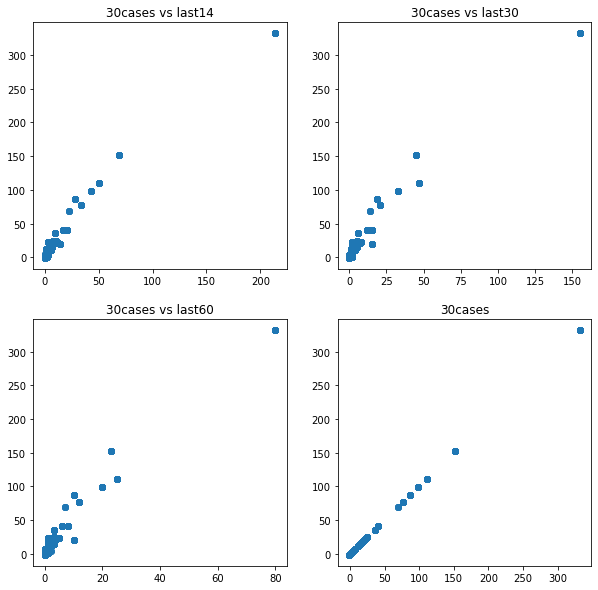

In [53]:
#Check the linear relationship between predictors and dependent variable by scatter plot
fig, axs = plt.subplots(2, 2,figsize =(10,10) )
axs[0, 0].scatter(reshape_df['last_14_days_cases'],reshape_df['30_sep_cases'])
axs[0, 0].set_title('30cases vs last14')
axs[0, 1].scatter(reshape_df['last_30_days_cases'],reshape_df['30_sep_cases'])
axs[0, 1].set_title('30cases vs last30')
axs[1, 0].scatter(reshape_df['last_60_days_cases'],reshape_df['30_sep_cases'])
axs[1, 0].set_title('30cases vs last60')
axs[1, 1].scatter(reshape_df['30_sep_cases'],reshape_df['30_sep_cases'])
axs[1, 1].set_title('30cases')

print('Correlation of 14days and DV:',pearsonr(reshape_df['last_14_days_cases'],reshape_df['30_sep_cases'])[0])
print('Correlation of 30days and DV:',pearsonr(reshape_df['last_30_days_cases'],reshape_df['30_sep_cases'])[0])
print('Correlation of 60days and DV:',pearsonr(reshape_df['last_60_days_cases'],reshape_df['30_sep_cases'])[0])

Based on the scatterplot and correlation, it seems that the all predictors have a significant linear relationship with the dependent variable.

Next, the normality will be checked by plot the histrogram of the predictors to identify whether the data is skewed.

Text(0.5, 1.0, '30cases')

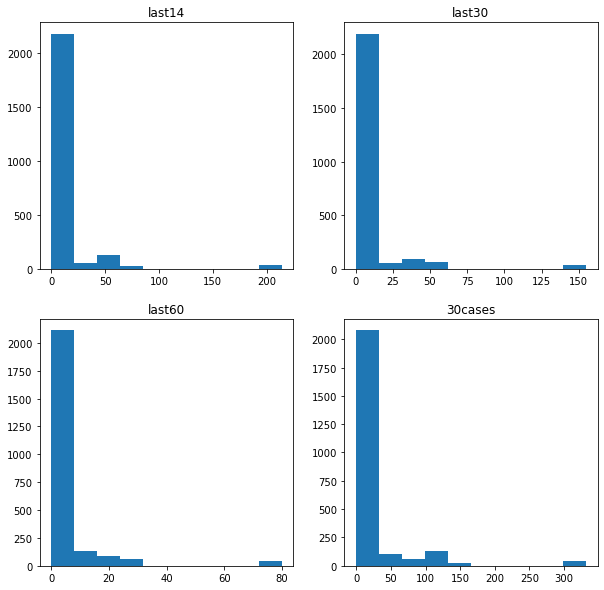

In [54]:
fig, axs = plt.subplots(2, 2,figsize =(10,10) )
axs[0, 0].hist(reshape_df['last_14_days_cases'])
axs[0, 0].set_title('last14')
axs[0, 1].hist(reshape_df['last_30_days_cases'])
axs[0, 1].set_title('last30')
axs[1, 0].hist(reshape_df['last_60_days_cases'])
axs[1, 0].set_title('last60')
axs[1, 1].hist(reshape_df['30_sep_cases'])
axs[1, 1].set_title('30cases')

According to the histrogram, it seems that all the predictors data is skew so we need to transform them to make it into a normal distributed data.

### 4.1 Root transformation

In this section, the square root will be applied to the data in each column to transform the data as the following:
The main command for this transformation is `math.sqrt()`.

In [55]:
#Root transformation
reshape_sq = pd.DataFrame()
reshape_sq['30_sep_cases'] = reshape_df['30_sep_cases']
reshape_sq['sq_last14'] = [math.sqrt(i) for i in reshape_df['last_14_days_cases']]
reshape_sq['sq_last30'] = [math.sqrt(i) for i in reshape_df['last_30_days_cases']]
reshape_sq['sq_last60'] = [math.sqrt(i) for i in reshape_df['last_60_days_cases']]

Once the data is transform, it will be used for plotting histrogram and scatterplot, and put in the `pearsonr()` for calculate the correlation.

Text(0.5, 1.0, '30cases')

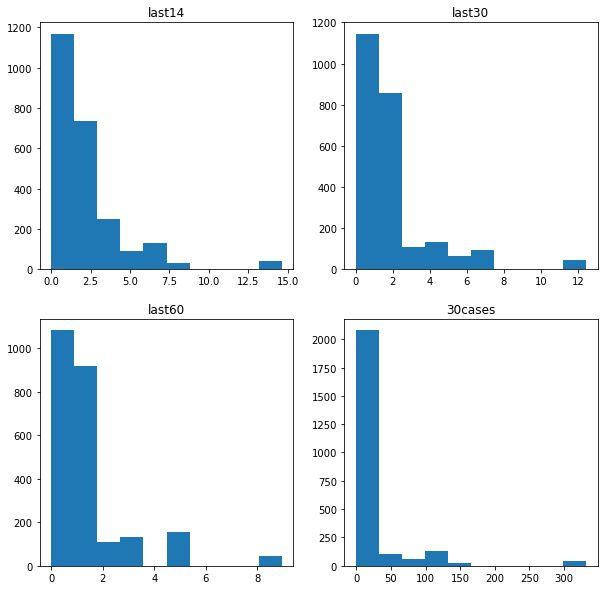

In [56]:
fig, axs = plt.subplots(2, 2,figsize =(10,10) )
axs[0, 0].hist(reshape_sq['sq_last14'])
axs[0, 0].set_title('last14')
axs[0, 1].hist(reshape_sq['sq_last30'])
axs[0, 1].set_title('last30')
axs[1, 0].hist(reshape_sq['sq_last60'])
axs[1, 0].set_title('last60')
axs[1, 1].hist(reshape_sq['30_sep_cases'])
axs[1, 1].set_title('30cases')

Correlation of root14days and DV: 0.9382810451528454
Correlation of root30days and DV: 0.9349125639433609
Correlation of root60days and DV: 0.9235752069745329


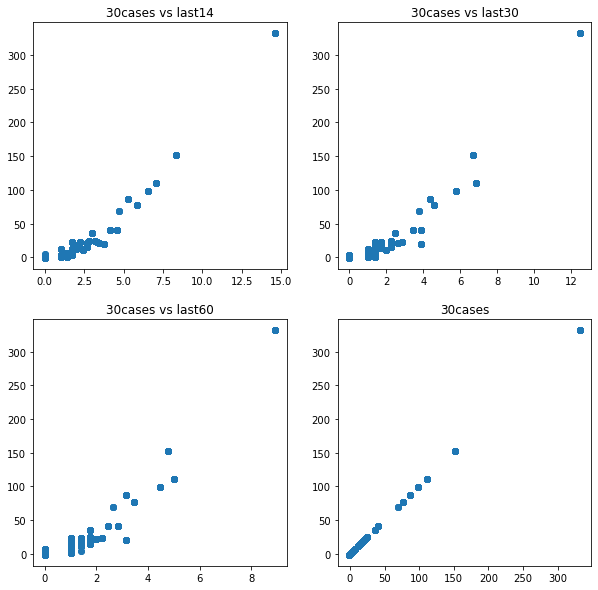

In [57]:
#Check the linear relationship between predictors and dependent variable by scatter plot after root transformation
fig, axs = plt.subplots(2, 2,figsize =(10,10) )
axs[0, 0].scatter(reshape_sq['sq_last14'],reshape_sq['30_sep_cases'])
axs[0, 0].set_title('30cases vs last14')
axs[0, 1].scatter(reshape_sq['sq_last30'],reshape_sq['30_sep_cases'])
axs[0, 1].set_title('30cases vs last30')
axs[1, 0].scatter(reshape_sq['sq_last60'],reshape_sq['30_sep_cases'])
axs[1, 0].set_title('30cases vs last60')
axs[1, 1].scatter(reshape_df['30_sep_cases'],reshape_sq['30_sep_cases'])
axs[1, 1].set_title('30cases')

#looking at the correlation
print('Correlation of root14days and DV:',pearsonr(reshape_sq['sq_last14'],reshape_sq['30_sep_cases'])[0])
print('Correlation of root30days and DV:',pearsonr(reshape_sq['sq_last30'],reshape_sq['30_sep_cases'])[0])
print('Correlation of root60days and DV:',pearsonr(reshape_sq['sq_last60'],reshape_sq['30_sep_cases'])[0])

Based on the root transformation, the data is still skew but the spread of the predictors and dependent variable is more wider and the correlation strength is decreased.

### 4.2 Square Transformation

In this section, the same procedure will be repeat. However, the difference is that the data will be transform by apply the square using `math.pow(x,2)` on the data as the following:

In [58]:
#Square transformation
reshape_pow = pd.DataFrame()
reshape_pow['30_sep_cases'] = reshape_df['30_sep_cases']
reshape_pow['pow_last14'] = [math.pow(i,2) for i in reshape_df['last_14_days_cases']]
reshape_pow['pow_last30'] = [math.pow(i,2) for i in reshape_df['last_30_days_cases']]
reshape_pow['pow_last60'] = [math.pow(i,2) for i in reshape_df['last_60_days_cases']]

Text(0.5, 1.0, '30cases')

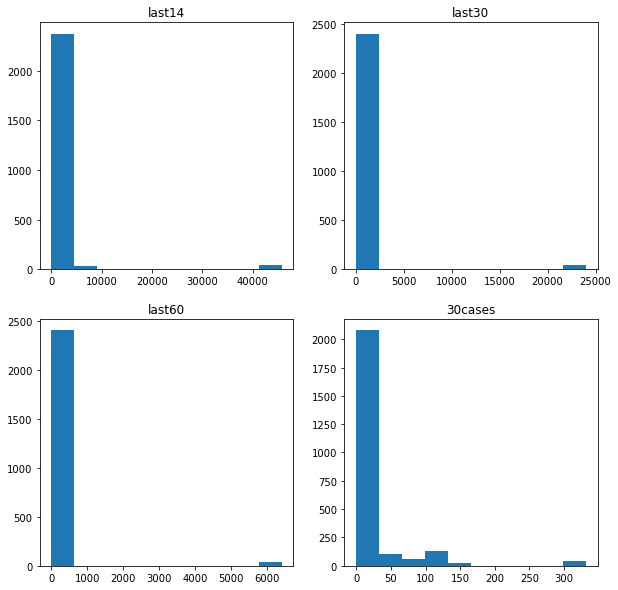

In [59]:
fig, axs = plt.subplots(2, 2,figsize =(10,10) )
axs[0, 0].hist(reshape_pow['pow_last14'])
axs[0, 0].set_title('last14')
axs[0, 1].hist(reshape_pow['pow_last30'])
axs[0, 1].set_title('last30')
axs[1, 0].hist(reshape_pow['pow_last60'])
axs[1, 0].set_title('last60')
axs[1, 1].hist(reshape_pow['30_sep_cases'])
axs[1, 1].set_title('30cases')

Correlation of pow14days and DV: 0.8685100901169568
Correlation of pow30days and DV: 0.875599137959501
Correlation of pow60days and DV: 0.8816660869210782


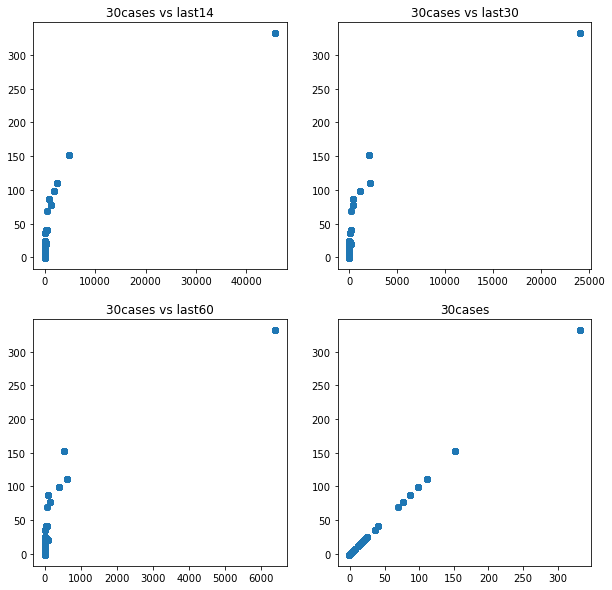

In [60]:
#Scatter plot of square transformation
fig, axs = plt.subplots(2, 2,figsize =(10,10) )
axs[0, 0].scatter(reshape_pow['pow_last14'],reshape_pow['30_sep_cases'])
axs[0, 0].set_title('30cases vs last14')
axs[0, 1].scatter(reshape_pow['pow_last30'],reshape_pow['30_sep_cases'])
axs[0, 1].set_title('30cases vs last30')
axs[1, 0].scatter(reshape_pow['pow_last60'],reshape_pow['30_sep_cases'])
axs[1, 0].set_title('30cases vs last60')
axs[1, 1].scatter(reshape_pow['30_sep_cases'],reshape_pow['30_sep_cases'])
axs[1, 1].set_title('30cases')

#looking at the correlation
print('Correlation of pow14days and DV:',pearsonr(reshape_pow['pow_last14'],reshape_pow['30_sep_cases'])[0])
print('Correlation of pow30days and DV:',pearsonr(reshape_pow['pow_last30'],reshape_pow['30_sep_cases'])[0])
print('Correlation of pow60days and DV:',pearsonr(reshape_pow['pow_last60'],reshape_pow['30_sep_cases'])[0])

Based on the square transformation, the data is more skew when comparing with the normal dataset, and the spread of the predictors and dependent variable is less wider and the correlation strength is decreased.

### 4.3 Log transformation

In this section, the log transformation will not be used in here because the data contain more zeros. As a result, we cannot applied the log transformation within this dataset.

### 4.4 Normalised the data based on the z-score standard

Based on the result of transformation, it seems that the transformation of the data is not necessary for this dataset. As regards the former statement, this time we can normalised the dataset and observing the linearity after normalisation.

The first step of normalisation is applying `preprocessing.StandardScaler().fit()` to fit the data for normalisation. After that, we will fit both predictors and dependent variables into the normalisation scaler by using `.transform()` which will transform both predictors and dependent variables.

In [61]:
#Normalise the data by using z-score (standardisation)
norm_scale = preprocessing.StandardScaler().fit(reshape_df[['30_sep_cases','last_14_days_cases','last_30_days_cases','last_60_days_cases']])
reshape_std = norm_scale.transform(reshape_df[['30_sep_cases','last_14_days_cases','last_30_days_cases','last_60_days_cases']])
reshape_std[0:5]

array([[-0.44790529, -0.35559896, -0.35516723, -0.36577958],
       [-0.42831956, -0.35559896, -0.35516723, -0.36577958],
       [-0.3891481 , -0.35559896, -0.35516723, -0.36577958],
       [ 1.49108207,  1.06649893,  1.12589389,  1.34966834],
       [-0.34997664, -0.25638283, -0.26540595, -0.28000718]])

Once the normalised value is acquired, they will be used for creat a new dataframe which is already normalised as the following:

In [62]:
reshape_norm = pd.DataFrame()
reshape_norm['30_sep_cases'] =reshape_std[:,0]
reshape_norm['last_14_days_cases'] = reshape_std[:,1]
reshape_norm['last_30_days_cases'] = reshape_std[:,2]
reshape_norm['last_60_days_cases'] = reshape_std[:,3]
reshape_norm.head()

,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
0,-0.447905,-0.355599,-0.355167,-0.365780
1,-0.428320,-0.355599,-0.355167,-0.365780
2,-0.389148,-0.355599,-0.355167,-0.365780
3,1.491082,1.066499,1.125894,1.349668
4,-0.349977,-0.256383,-0.265406,-0.280007


In order to check whether the data is normalised, they can be checked by using `.describe()` or using `.mean()` and `.std()` on each column. If the mean and std of data is 0 and 1, respectively.

In [63]:
reshape_norm.describe()

,30_sep_cases,last_14_days_cases,last_30_days_cases,last_60_days_cases
count,2.442000e+03,2.442000e+03,2.442000e+03,2.442000e+03
mean,-1.467113e-16,7.983422e-17,-3.781441e-16,3.366813e-16
std,1.000205e+00,1.000205e+00,1.000205e+00,1.000205e+00
min,-4.674910e-01,-3.555990e-01,-3.551672e-01,-3.657796e-01
25%,-4.479053e-01,-3.555990e-01,-3.551672e-01,-3.657796e-01
50%,-3.695624e-01,-2.563828e-01,-2.654059e-01,-2.800072e-01
75%,-1.701921e-02,-1.240947e-01,-1.307640e-01,-1.084624e-01
max,6.054557e+00,6.721818e+00,6.601332e+00,6.496012e+00


In [64]:
print('Mean after standardisation:\n30_Sep = {:.2f}, last_14 = {:.2f}, last_30 = {:.2f}, last_60 = {:.2f}'
      .format(reshape_std[:,0].mean(), reshape_std[:,1].mean(), reshape_std[:,2].mean(), reshape_std[:,3].mean()))
print('\nStandard deviation after standardisation:\n30_Sep = {:.2f}, last_14 = {:.2f}, last_30 = {:.2f}, last_60 = {:.2f}'
      .format(reshape_std[:,0].std(), reshape_std[:,1].std(),reshape_std[:,2].std(),reshape_std[:,3].std()))

Mean after standardisation:
30_Sep = -0.00, last_14 = 0.00, last_30 = 0.00, last_60 = -0.00

Standard deviation after standardisation:
30_Sep = 1.00, last_14 = 1.00, last_30 = 1.00, last_60 = 1.00


Once the data is normalised, it will be used for checking the linearity with the same procedure as the previous steps as the following:

Correlation of normalised 14days and DV: 0.9816710835179536
Correlation of normalised 30days and DV: 0.9801990108188283
Correlation of normalised 60days and DV: 0.9812428313302912


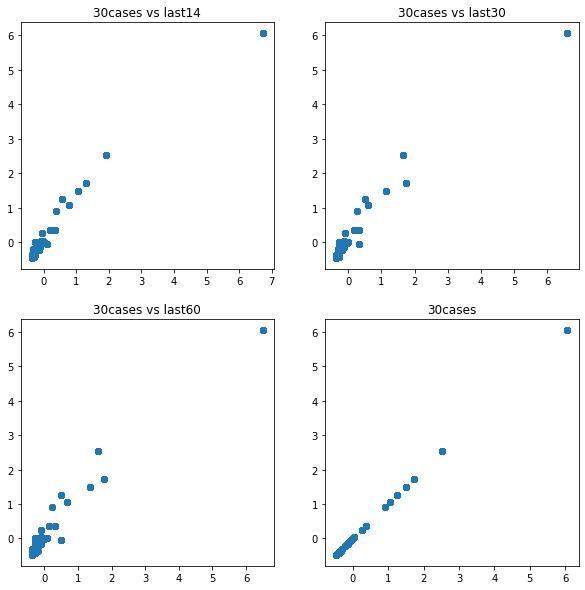

In [65]:
#Check the linear relationship between predictors and dependent variable by scatter plot after log transformation
fig, axs = plt.subplots(2, 2,figsize =(10,10) )
axs[0, 0].scatter(reshape_norm['last_14_days_cases'],reshape_norm['30_sep_cases'])
axs[0, 0].set_title('30cases vs last14')
axs[0, 1].scatter(reshape_norm['last_30_days_cases'],reshape_norm['30_sep_cases'])
axs[0, 1].set_title('30cases vs last30')
axs[1, 0].scatter(reshape_norm['last_60_days_cases'],reshape_norm['30_sep_cases'])
axs[1, 0].set_title('30cases vs last60')
axs[1, 1].scatter(reshape_norm['30_sep_cases'],reshape_norm['30_sep_cases'])
axs[1, 1].set_title('30cases')

#looking at the correlation
print('Correlation of normalised 14days and DV:',pearsonr(reshape_norm['last_14_days_cases'],reshape_norm['30_sep_cases'])[0])
print('Correlation of normalised 30days and DV:',pearsonr(reshape_norm['last_30_days_cases'],reshape_norm['30_sep_cases'])[0])
print('Correlation of normalised 60days and DV:',pearsonr(reshape_norm['last_60_days_cases'],reshape_norm['30_sep_cases'])[0])

According to the plot and correlation result, the result is the same as the dataset without any transformation or normalisation.

### 4.5 Linear Model Building

Lastly, all the dataset (Normal dataset, Root transformation dataset, Square transformation dataset, and Normalised dataset) will be used for creating a linear model and comparing their prediction performance based on R-square which is prediction accuracy(Bhandari,2020) and root mean square error (RMSE) which is an error in prediction (Moody,2019) as the following:

#### Linear model on normal dataset

In [66]:
#Building linear regression for normal dataset
x1 = reshape_df[['last_14_days_cases','last_30_days_cases','last_60_days_cases']]
y1 =  reshape_df['30_sep_cases']
X_train, X_test, y_train, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=100)
mod1 = LinearRegression() 
mod1.fit(X_train,y_train)
ypred1 = mod1.predict(X_test)

#### Linear model on root transformation on dataset

In [67]:
#Building linear regression for root transformation
x2 = reshape_sq[['sq_last14','sq_last30','sq_last60']]
y2 =  reshape_sq['30_sep_cases']
X_train, X_test, y_train, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=100)
mod2 = LinearRegression() 
mod2.fit(X_train,y_train)
ypred2 = mod2.predict(X_test)

#### Linear model on square transformation on dataset

In [68]:
#Building linear regression for square transformation
x3 = reshape_pow[['pow_last14','pow_last30','pow_last60']]
y3 =  reshape_pow['30_sep_cases']
X_train, X_test, y_train, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=100)
mod3 = LinearRegression() 
mod3.fit(X_train,y_train)
ypred3 = mod3.predict(X_test)

#### Linear model on normalised dataset

In [69]:
#Building linear regression for standardised dataset
x4 = reshape_norm[['last_14_days_cases','last_30_days_cases','last_60_days_cases']]
y4 =  reshape_norm['30_sep_cases']
X_train, X_test, y_train, y_test4 = train_test_split(x4, y4, test_size=0.2, random_state=100)
mod4 = LinearRegression() 
mod4.fit(X_train,y_train)
ypred4 = mod4.predict(X_test)

Once we get all the prediction value of each model, the function for evaluate the model r-square and RMSE will be created based on `r2_score()` and square root (`np.sqrt()`) on `metrics.mean_squared_error(observe,predict)` 

In [70]:
def model_performance(met,observe,predict):
    print(met)
    print('R-squared:', r2_score(observe, predict))
    print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(observe, predict)))
    print('\n')

In [71]:
model_performance('Normal dataset without any method',y_test1,ypred1)
model_performance('Root transformation',y_test2,ypred2)
model_performance('Square transformaion',y_test3,ypred3)
model_performance('Normalisation',y_test4,ypred4)

Normal dataset without any method
R-squared: 0.96566600214205
Root Mean Squared Error(RMSE): 8.868766744665935


Root transformation
R-squared: 0.8711975550374417
Root Mean Squared Error(RMSE): 17.177624243299242


Square transformaion
R-squared: 0.8056445973799695
Root Mean Squared Error(RMSE): 21.100821015355585


Normalisation
R-squared: 0.96566600214205
Root Mean Squared Error(RMSE): 0.1737012789055198




According to the following result, the transformation of the dataset is not necessary for creating a linear model for this dataset because it makes the accuracy decreased while the RMSE is increased. In addition, it seems that the model accuracy is almost at 1.0 (0.965) and the level and RMSE is the least (0.17) when this dataset is normalised. The reason for this improvement might be the differences in the unit of measurement between the dependent variable(number of cases) and predictors(average of case per numbers of day) so without any normalisation the error is higher.

## Conclusion

It seems that the covid-cases in lga of Victoria data is already normal distributed, so the transformation of the data is not require. In addition, the dataset with different unit measurement may have an effect on the root mean square error (error in the prediction). Also, the integration of data from many sources can be useful for collecting the relevant information based on the task requirement. Therefore, with all of the tasks combined together, it form a good insight from the dataset.

## References

- Amant. F. S. (2020a, May 23). <i>A Tutorial of what Kaggle won’t teach you: Web Scraping, Data Cleaning and more</i>. https://towardsdatascience.com/a-
    tutorial-of-what-kaggle-wont-teach-you-web-scraping-data-cleaning-and-more-16d402a206e8
- Amant. F. S. (2020b, June 4). <i>How to Scrape Multiple URLs with Python: Tutorial</i>. https://towardsdatascience.com/scraping-multiple-urls-with-python-
    tutorial-2b74432d085f
- Bewick, V., Cheek, L., & Ball, J. (2003). <i>Statistics review 7: Correlation and regression</i>. Critical care (London, England), 7(6), 451–459. 
    https://doi.org/10.1186/cc2401
- Bhandari, A.(2020, July 7). <i>Key Difference between R-squared and Adjusted R-squared for Regression Analysis</i>. 
    https://www.analyticsvidhya.com/blog/2020/07/difference-between-r-squared-and-adjusted-r-squared/
- Bhuiya, M. (2018, December 2). <i>How to read a shapefile in Python?</i>.https://gis.stackexchange.com/questions/113799/
    how-to-read-a-shapefile-in-python
- Chakraborti, N. (2019, April 1). <i>How to add a root to an existing XML which doesn't have a single root tag</i>. https://stackoverflow.com/questions/
    55455486/how-to-add-a-root-to-an-existing-xml-which-doesnt-have-a-single-root-tag
- <i>Creating multiple subplots using plt.subplots</i>.(n.d.) https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
- Dolon. B. (2020, July 19). <i>How to Quickly Create and Unpack Lists with Pandas</i>. https://towardsdatascience.com/how-to-quickly-create-and-unpack-lists-with-pandas-d0e78e487c75
- Geeksforgeeks. (2021, May 12). <i>Haversine formula to find distance between two points on a sphere</i>. https://www.geeksforgeeks.org/haversine-
    formula-to-find-distance-between-two-points-on-a-sphere/
- Hilsdolf M. (2020, September 7). <i>Dealing with List Values in Pandas Dataframes</i>. https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
- Kettle, S. (2017, May 10). <i>Distance on a sphere: The Haversine Formula</i>. https://community.esri.com/t5/coordinate-reference-systems-blog/distance-
    on-a-sphere-the-haversine-formula/ba-p/902128
- McKinney T. (2020, April 8). <i>Creating a range of dates in Python</i>. https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
- <i>Metrics and scoring: quantifying the quality of predictions</i>. (n.d.). https://scikit-learn.org/stable/modules/model_evaluation.html
- Moody J. (2019, September 6). <i>What does RMSE really mean?</i>. https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e
- <i>scipy.stats.pearsonr</i>. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
- Sandeep. (2011, May 5). <i>How to read line by line in pdf file using PyPdf?</i> https://stackoverflow.com/questions/2481945/how-to-read-line-by-line-in-pdf-file-using-pypdf
- Sgillies. (2014, May 12). <i>Creating Shapely LineString from two Points</i>. https://gis.stackexchange.com/questions/95670/creating-shapely-linestring-
    from-two-points
- <i>sklearn.linear_model.LinearRegression</i>. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Tabachnick & Fidell (1989). <i>Using multivariate statistics</i>(2nd edition).Introduction to Regression. New York: HarperCollins. 
    https://dss.princeton.edu/online_help/analysis/regression_intro.htm
- Tenkanen, H. (2018, January 17). <i>Point in Polygon & Intersect</i>. https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html